## CMB anisotropies

This is just another notebook for plottig the CMB anisotropies.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pylab as pil
import pandas as pd
from matplotlib import gridspec

## 1. Plotting $C_{\ell}^{\rm TT}$ 

first a simple plot outlining the theoretical predictions

In [3]:
cmb = np.loadtxt('./data/theory.dat')

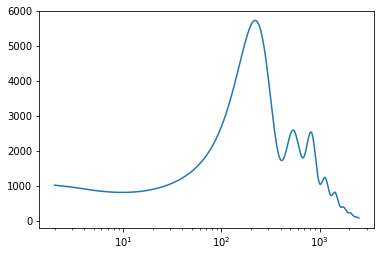

In [4]:
plt.semilogx(cmb[:,0], cmb[:,1])
plt.show()

read the file containing the TT measurements

In [5]:
TT = pd.read_csv('observed_TT.txt', delim_whitespace=True, skipinitialspace=True)
TT.head()

,Experiment,l_min,l_center,l_max,Power,Sigma_minus,Sigma_plus,Upper,Limit
0,ACTPol,-999,500.0,-999,2211.2,208.4,208.4,-999.0,NaN
1,ACTPol,-999,550.0,-999,2468.0,194.7,194.7,-999.0,NaN
2,ACTPol,-999,600.0,-999,2289.3,153.1,153.1,-999.0,NaN
3,ACTPol,-999,650.0,-999,1977.6,134.3,134.3,-999.0,NaN
4,ACTPol,-999,700.0,-999,1870.7,125.7,125.7,-999.0,NaN


In [6]:
TT.describe()

,l_min,l_center,l_max,Power,Sigma_minus,Sigma_plus,Upper,Limit
count,200.0,200.000000,200.0,200.000000,200.000000,200.000000,200.0,0.0
mean,-999.0,1308.921500,-999.0,989.500501,54.339000,75.999000,-999.0,NaN
std,0.0,896.099408,0.0,1051.833694,83.390985,158.046294,0.0,NaN
min,-999.0,2.000000,-999.0,0.400000,1.400000,1.400000,-999.0,NaN
25%,-999.0,611.025000,-999.0,231.350000,6.175000,6.175000,-999.0,NaN
50%,-999.0,1302.300000,-999.0,721.250000,16.700000,16.700000,-999.0,NaN
75%,-999.0,1979.900000,-999.0,1216.225000,62.125000,62.125000,-999.0,NaN
max,-999.0,4125.000000,-999.0,5793.399900,574.400000,1212.300000,-999.0,NaN


In [7]:
experiments = np.unique(TT['Experiment'].values)
experiments

array(['ACTPol', 'Planck_binned', 'Planck_unbinned', 'SPT'], dtype=object)

Read the Planck measurements at low l

In [9]:
TT_planck = TT.loc[TT['Experiment']=='Planck_unbinned']
TT_planck.head()

,Experiment,l_min,l_center,l_max,Power,Sigma_minus,Sigma_plus,Upper,Limit
42,Planck_unbinned,-999,2.0,-999,225.9,132.4,533.1,-999.0,NaN
43,Planck_unbinned,-999,3.0,-999,936.9,450.5,1212.3,-999.0,NaN
44,Planck_unbinned,-999,4.0,-999,692.2,294.1,666.5,-999.0,NaN
45,Planck_unbinned,-999,5.0,-999,1501.7,574.4,1155.8,-999.0,NaN
46,Planck_unbinned,-999,6.0,-999,557.6,201.2,375.8,-999.0,NaN


In [11]:
l_TT_planck = TT_planck['l_center'].values
cl_TT = TT_planck['Power'].values
cl_TT_p = TT_planck['Sigma_plus'].values
cl_TT_m = TT_planck['Sigma_minus'].values

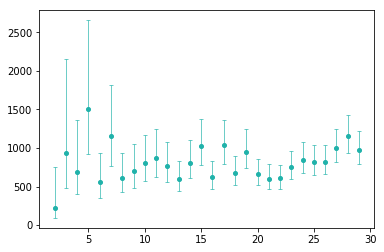

In [12]:
plt.errorbar(l_TT_planck, cl_TT, yerr=[cl_TT_m,cl_TT_p], linestyle = '', marker = 'o', 
             color = 'lightseagreen', label = r'Planck', barsabove = True,
             capsize =2, ms = 4, capthick = 0.65, linewidth = 0.65 )
plt.show()

read the high l measurements from Planck

In [23]:
TT_highl = TT.loc[TT['Experiment']=='Planck_binned']

In [43]:
TT_highl.head()

,Experiment,l_min,l_center,l_max,Power,Sigma_minus,Sigma_plus,Upper,Limit
70,Planck_binned,-999,47.7,-999,1479.3000,50.8,50.8,-999.0,NaN
71,Planck_binned,-999,76.5,-999,2035.0000,54.7,54.7,-999.0,NaN
72,Planck_binned,-999,105.9,-999,2955.3999,65.0,65.0,-999.0,NaN
73,Planck_binned,-999,135.6,-999,3869.5000,76.9,76.9,-999.0,NaN
74,Planck_binned,-999,165.4,-999,4889.5000,86.6,86.6,-999.0,NaN


In [24]:
l_TT_highl = TT_highl['l_center'].values
cl_TT_highl = TT_highl['Power'].values
cl_TT_highl_p = TT_highl['Sigma_plus'].values
cl_TT_highl_m = TT_highl['Sigma_minus'].values

Load the SPT measurements

In [55]:
TT_spt = TT.loc[TT['Experiment']=='SPT']

In [56]:
l_TT_spt = TT_spt['l_center'].values
cl_TT_spt = TT_spt['Power'].values
cl_TT_spt_p = TT_spt['Sigma_plus'].values
cl_TT_spt_m = TT_spt['Sigma_minus'].values

Load the ACT measurements

In [71]:
TT_act = TT.loc[TT['Experiment']=='ACTPol']

In [72]:
l_TT_act = TT_act['l_center'].values
cl_TT_act = TT_act['Power'].values
cl_TT_act_p = TT_act['Sigma_plus'].values
cl_TT_act_m = TT_act['Sigma_minus'].values

finally plot the LCDM and the measurements

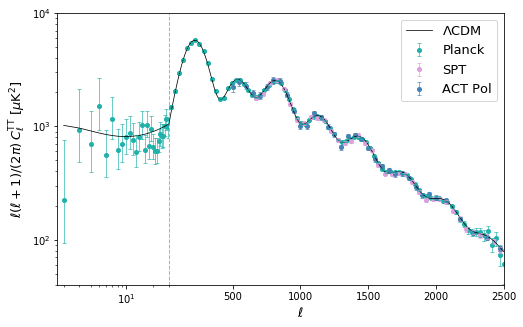

In [74]:
fig = plt.figure(figsize=(8, 5))
gs = gridspec.GridSpec(1,2,width_ratios=[0.5,1.5], wspace=0)
ax1 = plt.subplot(gs[0, 0])
ax2 = plt.subplot(gs[0, 1])


# if I want to turn on the grid
#ax1.grid(b=True, which='minor', color='black', linewidth=0.5, alpha=0.4)
#ax2.grid(b=True, which='minor', color='black', linewidth=0.5, alpha=0.4)

ax1.axvline(30, linestyle='--', linewidth=1, alpha=0.5)
ax2.axvline(30, linestyle='--', linewidth=1, alpha=0.5)

ax1.set_xlim(1.7,30)
ax1.set_ylim(40,10e3)
ax2.set_xlim(30,2500)
ax2.set_ylim(40,10e3)
ax2.set_yticklabels([])
ax2.set_yticks([])
ax2.axes.get_yaxis().set_visible(False)
ax1.spines['right'].set_visible(False)
ax2.spines['left'].set_visible(False)

# plot the data

ax1.loglog(cmb[:,0], cmb[:,1], color = 'black', linewidth = 0.75)
ax2.semilogy(cmb[:,0], cmb[:,1], color = 'black', linewidth = 0.75, label = r'$\Lambda$CDM')
ax1.errorbar(l_TT_planck, cl_TT, yerr=[cl_TT_m,cl_TT_p], linestyle = '', marker = 'o', 
             color = 'lightseagreen', label = r'Planck', barsabove = True,
             capsize =2, ms = 4, capthick = 0.65, linewidth = 0.65 )

ax2.errorbar(l_TT_highl, cl_TT_highl, yerr=[cl_TT_highl_m,cl_TT_highl_p], linestyle = '', 
             marker = 'o', color = 'lightseagreen', label = r'Planck', barsabove = True,
             capsize =2, ms = 4, capthick = 0.65, linewidth = 0.65 )

ax2.errorbar(l_TT_spt, cl_TT_spt, yerr=[cl_TT_spt_m,cl_TT_spt_p], linestyle = '', 
             marker = 'o', color = 'plum', label = r'SPT', barsabove = True,
             capsize =2, ms = 4, capthick = 0.65, linewidth = 0.65 )

ax2.errorbar(l_TT_act, cl_TT_act, yerr=[cl_TT_act_m,cl_TT_act_p], linestyle = '', 
             marker = 'o', color = 'steelblue', label = r'ACT Pol', barsabove = True,
             capsize =2, ms = 4, capthick = 0.65, linewidth = 0.65 )



ax2.legend(loc='upper right', fontsize= 13)
ax1.set_ylabel(r'$\ell (\ell+1) / (2 \pi) \, C_{\ell}^{\rm TT}$ $[\mu {\rm K}^2]$', fontsize= 13)

ax2.set_xlabel(r'$\ell$           	', fontsize= 13)
pil.savefig('./plots/cltt.pdf', bbox_inches='tight')
plt.show()

# 2. Measurements of the $C_{\ell}^{\rm EE}$ polarization pattern

In [81]:
EE = pd.read_csv('observed_EE.txt', skipinitialspace=True)
EE.head()

,Experiment,l_min,l_center,l_max,Power,Sigma_minus,Sigma_plus,Upper Limit
0,ACTPol_2016,NaN,350.0,NaN,18.773,1.793,1.793,NaN
1,ACTPol_2016,NaN,400.0,NaN,21.330,2.023,2.023,NaN
2,ACTPol_2016,NaN,450.0,NaN,15.424,1.489,1.489,NaN
3,ACTPol_2016,NaN,500.0,NaN,9.451,1.037,1.037,NaN
4,ACTPol_2016,NaN,550.0,NaN,9.396,1.065,1.065,NaN


In [82]:
experiments = np.unique(EE['Experiment      '].values)
experiments

array(['ACTPol_2016        ', 'BICEP2/Keck_2015   ', 'Planck_2018        ',
       'SPTpol_2017        ', 'WMAP_2013          '], dtype=object)

Planck measurements

In [139]:
EE_planck = EE.loc[EE['Experiment      '] == 'Planck_2018        ' ]
EE_planck.head()

,Experiment,l_min,l_center,l_max,Power,Sigma_minus,Sigma_plus,Upper Limit
54,Planck_2018,NaN,2.0,NaN,0.110,0.061,0.061,NaN
55,Planck_2018,NaN,3.0,NaN,0.038,0.040,0.040,NaN
56,Planck_2018,NaN,4.0,NaN,0.018,0.024,0.024,NaN
57,Planck_2018,NaN,5.0,NaN,0.045,0.016,0.016,NaN
58,Planck_2018,NaN,6.0,NaN,0.012,0.014,0.014,NaN


In [125]:
l_EE_planck = EE_planck['l_center '].values
cl_EE_planck = EE_planck['Power  '].values/(l_EE_planck+1)/l_EE_planck*1e5*6.2830
cl_EE_planck_p = EE_planck['Sigma_plus '].values/(l_EE_planck+1)/l_EE_planck*1e5*6.2830
cl_EE_planck_m = EE_planck['Sigma_minus '].values/(l_EE_planck+1)/l_EE_planck*1e5*6.2830

Get the EE measurements from ACT

In [140]:
EE_act = EE.loc[EE['Experiment      '] == 'ACTPol_2016        ' ]
EE_act.head()

,Experiment,l_min,l_center,l_max,Power,Sigma_minus,Sigma_plus,Upper Limit
0,ACTPol_2016,NaN,350.0,NaN,18.773,1.793,1.793,NaN
1,ACTPol_2016,NaN,400.0,NaN,21.330,2.023,2.023,NaN
2,ACTPol_2016,NaN,450.0,NaN,15.424,1.489,1.489,NaN
3,ACTPol_2016,NaN,500.0,NaN,9.451,1.037,1.037,NaN
4,ACTPol_2016,NaN,550.0,NaN,9.396,1.065,1.065,NaN


In [142]:
l_EE_act = EE_act['l_center '].values
cl_EE_act = EE_act['Power  '].values/(l_EE_act+1)/l_EE_act*1e5*6.2830
cl_EE_act_p = EE_act['Sigma_plus '].values/(l_EE_act+1)/l_EE_act*1e5*6.2830
cl_EE_act_m = EE_act['Sigma_minus '].values/(l_EE_act+1)/l_EE_act*1e5*6.2830

In [146]:
EE_spt = EE.loc[EE['Experiment      '] == 'SPTpol_2017        ' ]
EE_spt.head()

,Experiment,l_min,l_center,l_max,Power,Sigma_minus,Sigma_plus,Upper Limit
148,SPTpol_2017,NaN,75.8,NaN,0.4,0.1,0.1,NaN
149,SPTpol_2017,NaN,124.8,NaN,1.0,0.2,0.2,NaN
150,SPTpol_2017,NaN,174.7,NaN,0.7,0.1,0.1,NaN
151,SPTpol_2017,NaN,224.6,NaN,0.7,0.2,0.2,NaN
152,SPTpol_2017,NaN,274.6,NaN,4.4,0.5,0.5,NaN


In [147]:
l_EE_spt = EE_spt['l_center '].values
cl_EE_spt = EE_spt['Power  '].values/(l_EE_spt+1)/l_EE_spt*1e5*6.2830
cl_EE_spt_p = EE_spt['Sigma_plus '].values/(l_EE_spt+1)/l_EE_spt*1e5*6.2830
cl_EE_spt_m = EE_spt['Sigma_minus '].values/(l_EE_spt+1)/l_EE_spt*1e5*6.2830

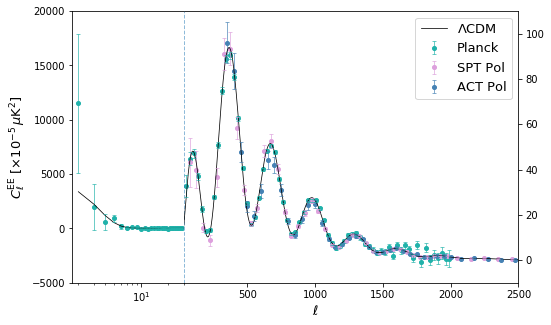

In [151]:
fig = plt.figure(figsize=(8, 5))
gs = gridspec.GridSpec(1,2,width_ratios=[0.5,1.5], wspace=0)
ax1 = plt.subplot(gs[0, 0])
ax2 = plt.subplot(gs[0, 1])


# if I want to turn on the grid
#ax1.grid(b=True, which='minor', color='black', linewidth=0.5, alpha=0.4)
#ax2.grid(b=True, which='minor', color='black', linewidth=0.5, alpha=0.4)

ax1.axvline(30, linestyle='--', linewidth=1, alpha=0.5)
ax2.axvline(30, linestyle='--', linewidth=1, alpha=0.5)

ax1.set_xlim(1.7,30)
ax1.set_ylim(-5000,20000)
ax2.set_xlim(30,2500)
ax2.set_ylim(-10,110)
#ax2.axes.get_yaxis().set_visible(False)
ax1.spines['right'].set_visible(False)
ax2.spines['left'].set_visible(False)
ax2.yaxis.tick_right()
#ax2.set_yticklabels([])
#ax2.set_yticks([])

# plot the data

ax1.semilogx(cmb[:,0], cmb[:,3]/(cmb[:,0]+1)/cmb[:,0]*1e5*6.2830, color = 'black', linewidth = 0.75)
ax2.plot(cmb[:,0], cmb[:,3]/(cmb[:,0]+1)/cmb[:,0]*1e5*6.2830, color = 'black', linewidth = 0.75, label = r'$\Lambda$CDM')
ax1.errorbar(l_EE_planck[:29], cl_EE_planck[:29], yerr=[cl_EE_planck_m[:29],cl_EE_planck_p[:29]], linestyle = '', marker = 'o', 
             color = 'lightseagreen', label = r'Planck', barsabove = True,
             capsize =2, ms = 4, capthick = 0.65, linewidth = 0.65 )

ax2.errorbar(l_EE_planck[28:], cl_EE_planck[28:], yerr=[cl_EE_planck_m[28:],cl_EE_planck_p[28:]], linestyle = '', marker = 'o', 
             color = 'lightseagreen', label = r'Planck', barsabove = True,
             capsize =2, ms = 4, capthick = 0.65, linewidth = 0.65 )



ax2.errorbar(l_EE_spt, cl_EE_spt, yerr=[cl_EE_spt_m,cl_EE_spt_p], linestyle = '', marker = 'o', 
             color = 'plum', label = r'SPT Pol', barsabove = True,
             capsize =2, ms = 4, capthick = 0.65, linewidth = 0.65 )

ax2.errorbar(l_EE_act, cl_EE_act, yerr=[cl_EE_act_m,cl_EE_act_p], linestyle = '', marker = 'o', 
             color = 'steelblue', label = r'ACT Pol', barsabove = True,
             capsize =2, ms = 4, capthick = 0.65, linewidth = 0.65 )



#ax2.errorbar(l_TT_highl, cl_TT_highl, yerr=[cl_TT_highl_m,cl_TT_highl_p], linestyle = '', 
#             marker = 'o', color = 'lightseagreen', label = r'Planck', barsabove = True,
#             capsize =2, ms = 4, capthick = 0.65, linewidth = 0.65 )

#ax2.errorbar(l_TT_spt, cl_TT_spt, yerr=[cl_TT_spt_m,cl_TT_spt_p], linestyle = '', 
#             marker = 'o', color = 'plum', label = r'SPT', barsabove = True,
#             capsize =2, ms = 4, capthick = 0.65, linewidth = 0.65 )

#ax2.errorbar(l_TT_act, cl_TT_act, yerr=[cl_TT_act_m,cl_TT_act_p], linestyle = '', 
#             marker = 'o', color = 'steelblue', label = r'ACT Pol', barsabove = True,
#             capsize =2, ms = 4, capthick = 0.65, linewidth = 0.65 )



ax2.legend(loc='upper right', fontsize= 13)
ax1.set_ylabel(r'$ C_{\ell}^{\rm EE}$ $[\times 10^{-5} \,\mu {\rm K}^2]$', fontsize= 13)

ax2.set_xlabel(r'$\ell$           	', fontsize= 13)
pil.savefig('./plots/clee.pdf', bbox_inches='tight')
plt.show()

## 3. Plotting $C_{\ell}^{\rm TE}$ 

In [152]:
TE = pd.read_csv('observed_TE.txt', skipinitialspace=True)
TE.head()

,Experiment,l_min,l_center,l_max,Power,Sigma_minus,Sigma_plus,Upper Limit
0,ACTPol_2016,NaN,350.0,NaN,85.45,19.09,19.09,NaN
1,ACTPol_2016,NaN,400.0,NaN,-9.44,15.67,15.67,NaN
2,ACTPol_2016,NaN,450.0,NaN,-65.73,14.16,14.16,NaN
3,ACTPol_2016,NaN,500.0,NaN,-43.89,12.55,12.55,NaN
4,ACTPol_2016,NaN,550.0,NaN,16.65,11.88,11.88,NaN


In [153]:
experiments = np.unique(TE['Experiment      '].values)
experiments

array(['ACTPol_2016        ', 'BICEP2/Keck_2015   ', 'Planck_2018        ',
       'SPTpol_2017        ', 'WMAP_2013          '], dtype=object)

In [154]:
TE_planck = TE.loc[TE['Experiment      '] == 'Planck_2018        ' ]
TE_planck.head()

,Experiment,l_min,l_center,l_max,Power,Sigma_minus,Sigma_plus,Upper Limit
54,Planck_2018,NaN,2.0,NaN,2.96,4.03,4.03,NaN
55,Planck_2018,NaN,3.0,NaN,-2.79,3.13,3.13,NaN
56,Planck_2018,NaN,4.0,NaN,1.99,2.52,2.52,NaN
57,Planck_2018,NaN,5.0,NaN,3.58,1.87,1.87,NaN
58,Planck_2018,NaN,6.0,NaN,0.46,1.68,1.68,NaN


In [156]:
l_TE_planck = TE_planck['l_center '].values
cl_TE_planck = TE_planck['Power  '].values
cl_TE_planck_p = TE_planck['Sigma_plus '].values
cl_TE_planck_m = TE_planck['Sigma_minus '].values

In [157]:
TE_act = TE.loc[TE['Experiment      '] == 'ACTPol_2016        ' ]
l_TE_act = TE_act['l_center '].values
cl_TE_act = TE_act['Power  '].values
cl_TE_act_p = TE_act['Sigma_plus '].values
cl_TE_act_m = TE_act['Sigma_minus '].values

In [158]:
TE_spt = TE.loc[TE['Experiment      '] == 'SPTpol_2017        ' ]
l_TE_spt = TE_spt['l_center '].values
cl_TE_spt = TE_spt['Power  '].values
cl_TE_spt_p = TE_spt['Sigma_plus '].values
cl_TE_spt_m = TE_spt['Sigma_minus '].values

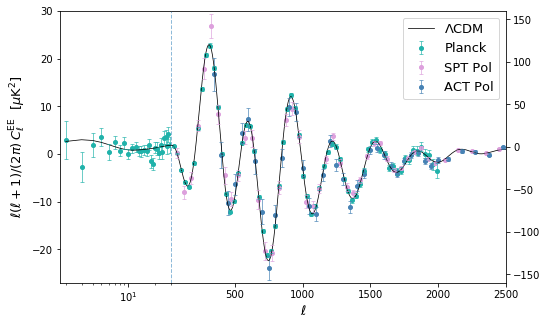

In [163]:
fig = plt.figure(figsize=(8, 5))
gs = gridspec.GridSpec(1,2,width_ratios=[0.5,1.5], wspace=0)
ax1 = plt.subplot(gs[0, 0])
ax2 = plt.subplot(gs[0, 1])


# if I want to turn on the grid
#ax1.grid(b=True, which='minor', color='black', linewidth=0.5, alpha=0.4)
#ax2.grid(b=True, which='minor', color='black', linewidth=0.5, alpha=0.4)

ax1.axvline(30, linestyle='--', linewidth=1, alpha=0.5)
ax2.axvline(30, linestyle='--', linewidth=1, alpha=0.5)

ax1.set_xlim(1.7,30)
ax1.set_ylim(-27,30)
ax2.set_xlim(30,2500)
ax2.set_ylim(-160,160)
#ax2.axes.get_yaxis().set_visible(False)
ax1.spines['right'].set_visible(False)
ax2.spines['left'].set_visible(False)
ax2.yaxis.tick_right()
#ax2.set_yticklabels([])
#ax2.set_yticks([])

# plot the data

ax1.semilogx(cmb[:,0], cmb[:,2], color = 'black', linewidth = 0.75)
ax2.plot(cmb[:,0], cmb[:,2], color = 'black', linewidth = 0.75, label = r'$\Lambda$CDM')
ax1.errorbar(l_TE_planck[:29], cl_TE_planck[:29], yerr=[cl_TE_planck_m[:29],cl_TE_planck_p[:29]], linestyle = '', marker = 'o', 
             color = 'lightseagreen', label = r'Planck', barsabove = True,
             capsize =2, ms = 4, capthick = 0.65, linewidth = 0.65 )

ax2.errorbar(l_TE_planck[28:], cl_TE_planck[28:], yerr=[cl_TE_planck_m[28:],cl_TE_planck_p[28:]], linestyle = '', marker = 'o', 
             color = 'lightseagreen', label = r'Planck', barsabove = True,
             capsize =2, ms = 4, capthick = 0.65, linewidth = 0.65 )


ax2.errorbar(l_TE_spt, cl_TE_spt, yerr=[cl_TE_spt_m,cl_TE_spt_p], linestyle = '', marker = 'o', 
             color = 'plum', label = r'SPT Pol', barsabove = True,
             capsize =2, ms = 4, capthick = 0.65, linewidth = 0.65 )

ax2.errorbar(l_TE_act, cl_TE_act, yerr=[cl_TE_act_m,cl_TE_act_p], linestyle = '', marker = 'o', 
             color = 'steelblue', label = r'ACT Pol', barsabove = True,
             capsize =2, ms = 4, capthick = 0.65, linewidth = 0.65 )


ax2.legend(loc='upper right', fontsize= 13)
ax1.set_ylabel(r'$ \ell (\ell+1)/(2\pi) \, C_{\ell}^{\rm EE}$  $[\mu {\rm K}^2]$', fontsize= 13)

ax2.set_xlabel(r'$\ell$           	', fontsize= 13)
pil.savefig('./plots/clte.pdf', bbox_inches='tight')
plt.show()

## 4. Plotting $C_{\ell}^{\rm BB}$

In [164]:
BB = pd.read_csv('observed_Bmode.dat', skipinitialspace=True)
BB.head()

,Experiment,l_min,l_center,l_max,Power,Sigma_minus,Sigma_plus,Upper Limit
0,BICEP2,21,45.1,55,0.0087,0.0019,0.0019,NaN
1,BICEP2,56,73.9,90,0.0133,0.0017,0.0017,NaN
2,BICEP2,91,109.1,125,0.0150,0.0025,0.0025,NaN
3,BICEP2,126,144.2,160,0.0139,0.0037,0.0037,NaN
4,BICEP2,161,179.1,195,0.0206,0.0056,0.0056,NaN


In [165]:
experiments = np.unique(BB['Experiment      '].values)
experiments

array(['BICEP2             ', 'BICEP2+Keck        ', 'BICEP2+Keck/Planck ',
       'POLARBEAR          ', 'SPTpol             '], dtype=object)

In [182]:
BB_BKP = BB.loc[BB['Experiment      '] == 'BICEP2+Keck/Planck ' ]
l_BB_BKP = BB_BKP['l_center '].values
l_BB_BKP_p = BB_BKP['l_max '].values
l_BB_BKP_m = BB_BKP['l_min '].values
cl_BB_BKP = BB_BKP['Power  '].values
cl_BB_BKP_p = BB_BKP['Sigma_plus '].values
cl_BB_BKP_m = BB_BKP['Sigma_minus '].values

In [184]:
BB_spt = BB.loc[BB['Experiment      '] == 'SPTpol             ' ]
l_BB_spt = BB_spt['l_center '].values
l_BB_spt_p = BB_spt['l_max '].values
l_BB_spt_m = BB_spt['l_min '].values
cl_BB_spt = BB_spt['Power  '].values
cl_BB_spt_p = BB_spt['Sigma_plus '].values
cl_BB_spt_m = BB_spt['Sigma_minus '].values

In [186]:
BB_pol = BB.loc[BB['Experiment      '] == 'POLARBEAR          ' ]
l_BB_pol = BB_pol['l_center '].values
l_BB_pol_p = BB_pol['l_max '].values
l_BB_pol_m = BB_pol['l_min '].values
cl_BB_pol = BB_pol['Power  '].values
cl_BB_pol_p = BB_pol['Sigma_plus '].values
cl_BB_pol_m = BB_pol['Sigma_minus '].values

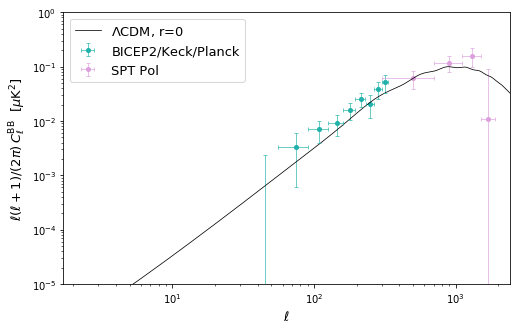

In [185]:
fig = plt.figure(figsize=(8, 5))

plt.xlim(1.7,2400)
plt.ylim(1e-5,1)
#ax2.axes.get_yaxis().set_visible(False)
#ax1.spines['right'].set_visible(False)
#ax2.spines['left'].set_visible(False)
#ax2.yaxis.tick_right()
#ax2.set_yticklabels([])
#ax2.set_yticks([])

# plot the data

plt.loglog(cmb[:,0], cmb[:,4], color = 'black', linewidth = 0.75, label = r'$\Lambda$CDM, r=0')

plt.errorbar(l_BB_BKP, cl_BB_BKP, xerr=[l_BB_BKP-l_BB_BKP_m,l_BB_BKP_p-l_BB_BKP],
             yerr=[cl_BB_BKP_m,cl_BB_BKP_p], linestyle = '', marker = 'o', 
             color = 'lightseagreen', label = r'BICEP2/Keck/Planck', barsabove = True,
             capsize =2, ms = 4, capthick = 0.65, linewidth = 0.65 )

#ax2.errorbar(l_TE_planck[28:], cl_TE_planck[28:], yerr=[cl_TE_planck_m[28:],cl_TE_planck_p[28:]], linestyle = '', marker = 'o', 
#             color = 'lightseagreen', label = r'Planck', barsabove = True,
#             capsize =2, ms = 4, capthick = 0.65, linewidth = 0.65 )


plt.errorbar(l_BB_spt, cl_BB_spt, xerr=[l_BB_spt-l_BB_spt_m,l_BB_spt_p-l_BB_spt], 
             yerr=[cl_BB_spt_m,cl_BB_spt_p], linestyle = '', marker = 'o', 
             color = 'plum', label = r'SPT Pol', barsabove = True,
             capsize =2, ms = 4, capthick = 0.65, linewidth = 0.65 )

plt.errorbar(l_BB_pol, cl_BB_pol, yerr=[cl_BB_pol_m,cl_TE_act_p], linestyle = '', marker = 'o', 
            color = 'steelblue', label = r'POLARBEAR', barsabove = True,
             capsize =2, ms = 4, capthick = 0.65, linewidth = 0.65 )


plt.legend(loc='upper left', fontsize= 13)
plt.ylabel(r'$ \ell (\ell+1)/(2\pi) \, C_{\ell}^{\rm BB}$  $[\mu {\rm K}^2]$', fontsize= 13)

plt.xlabel(r'$\ell$', fontsize= 13)
#pil.savefig('./plots/clbb.pdf', bbox_inches='tight')
plt.show()